In [1]:
library(readr)
library(dplyr)
library(stringr)
library(lfe)
library(lubridate)
library(ggplot2)
library(ggsci)
library(doMC)
library(tidyr)
library(scales)
registerDoMC(4)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
fp      <- '/pool001/mfzhao/'
df      <- read_rds(str_c(fp, '/PROCESSED_DATA/panel_pre_xgr.RDS'))
policy  <- read_csv(str_c(fp, 'PROCESSED_DATA/policyPeriods.csv'))
dyad    <- data.table::fread('/pool001/mfzhao/PROCESSED_DATA/dyadic_mvmt_2020.csv')

Parsed with column specification:
cols(
  key = col_character(),
  p1sdp = col_date(format = ""),
  p2shp = col_date(format = ""),
  p3rop = col_date(format = "")
)



In [3]:
cns <- colnames(df)
cns

[1] "key"                      "date"                    
  [3] "mcbgv"                    "pnchd"                   
  [5] "pgt1hafh"                 "ppthlt75"                
  [7] "pgt2kmt"                  "dmcbgv"                  
  [9] "dpnchd"                   "dpgt1hafh"               
 [11] "dppthlt75"                "dpgt2kmt"                
 [13] "pcmcbgv"                  "pcpnchd"                 
 [15] "pcpgt1hafh"               "pcppthlt75"              
 [17] "pcpgt2kmt"                "cluster"                 
 [19] "n"                        "cases"                   
 [21] "deaths"                   "newcases"                
 [23] "newdeaths"                "p1sdp"                   
 [25] "p2shp"                    "p3rop"                   
 [27] "p1sdpDSS"                 "p2shpDSS"                
 [29] "p3ropDSS"                 "PRCP"                    
 [31] "TMAX"                     "PRCP.2019"               
 [33] "TMAX.2019"                "prcp01"                  
 [35] "prcp02"                   "prcp03"                  
 [37] "prcp04"                   "prcp05"                  
 [39] "prcp06"                   "prcp07"                  
 [41] "prcp08"                   "prcp09"                  
 [43] "prcp10"                   "tmax02"                  
 [45] "tmax03"                   "tmax04"                  
 [47] "tmax05"                   "tmax06"                  
 [49] "tmax07"                   "tmax08"                  
 [51] "tmax09"                   "tmax10"                  
 [53] "mcbgv_p1sdp"              "pnchd_p1sdp"             
 [55] "pgt1hafh_p1sdp"           "ppthlt75_p1sdp"          
 [57] "pgt2kmt_p1sdp"            "dmcbgv_p1sdp"            
 [59] "dpnchd_p1sdp"             "dpgt1hafh_p1sdp"         
 [61] "dppthlt75_p1sdp"          "dpgt2kmt_p1sdp"          
 [63] "pcmcbgv_p1sdp"            "pcpnchd_p1sdp"           
 [65] "pcpgt1hafh_p1sdp"         "pcppthlt75_p1sdp"        
 [67] "pcpgt2kmt_p1sdp"          "PRCP_p1sdp"              
 [69] "PRCP.2019_p1sdp"          "prcp01_p1sdp"            
 [71] "prcp02_p1sdp"             "prcp03_p1sdp"            
 [73] "prcp04_p1sdp"             "prcp05_p1sdp"            
 [75] "prcp06_p1sdp"             "prcp07_p1sdp"            
 [77] "prcp08_p1sdp"             "prcp09_p1sdp"            
 [79] "prcp10_p1sdp"             "TMAX_p1sdp"              
 [81] "TMAX.2019_p1sdp"          "tmax02_p1sdp"            
 [83] "tmax03_p1sdp"             "tmax04_p1sdp"            
 [85] "tmax05_p1sdp"             "tmax06_p1sdp"            
 [87] "tmax07_p1sdp"             "tmax08_p1sdp"            
 [89] "tmax09_p1sdp"             "tmax10_p1sdp"            
 [91] "mcbgv_p2shp"              "pnchd_p2shp"             
 [93] "pgt1hafh_p2shp"           "ppthlt75_p2shp"          
 [95] "pgt2kmt_p2shp"            "dmcbgv_p2shp"            
 [97] "dpnchd_p2shp"             "dpgt1hafh_p2shp"         
 [99] "dppthlt75_p2shp"          "dpgt2kmt_p2shp"          
[101] "pcmcbgv_p2shp"            "pcpnchd_p2shp"           
[103] "pcpgt1hafh_p2shp"         "pcppthlt75_p2shp"        
[105] "pcpgt2kmt_p2shp"          "PRCP_p2shp"              
[107] "PRCP.2019_p2shp"          "prcp01_p2shp"            
[109] "prcp02_p2shp"             "prcp03_p2shp"            
[111] "prcp04_p2shp"             "prcp05_p2shp"            
[113] "prcp06_p2shp"             "prcp07_p2shp"            
[115] "prcp08_p2shp"             "prcp09_p2shp"            
[117] "prcp10_p2shp"             "TMAX_p2shp"              
[119] "TMAX.2019_p2shp"          "tmax02_p2shp"            
[121] "tmax03_p2shp"             "tmax04_p2shp"            
[123] "tmax05_p2shp"             "tmax06_p2shp"            
[125] "tmax07_p2shp"             "tmax08_p2shp"            
[127] "tmax09_p2shp"             "tmax10_p2shp"            
[129] "mcbgv_p3rop"              "pnchd_p3rop"             
[131] "pgt1hafh_p3rop"           "ppthlt75_p3rop"          
[133] "pgt2kmt_p3rop"            "dmcbgv_p

In [4]:
dvs <- c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd')

Joining, by = "state"



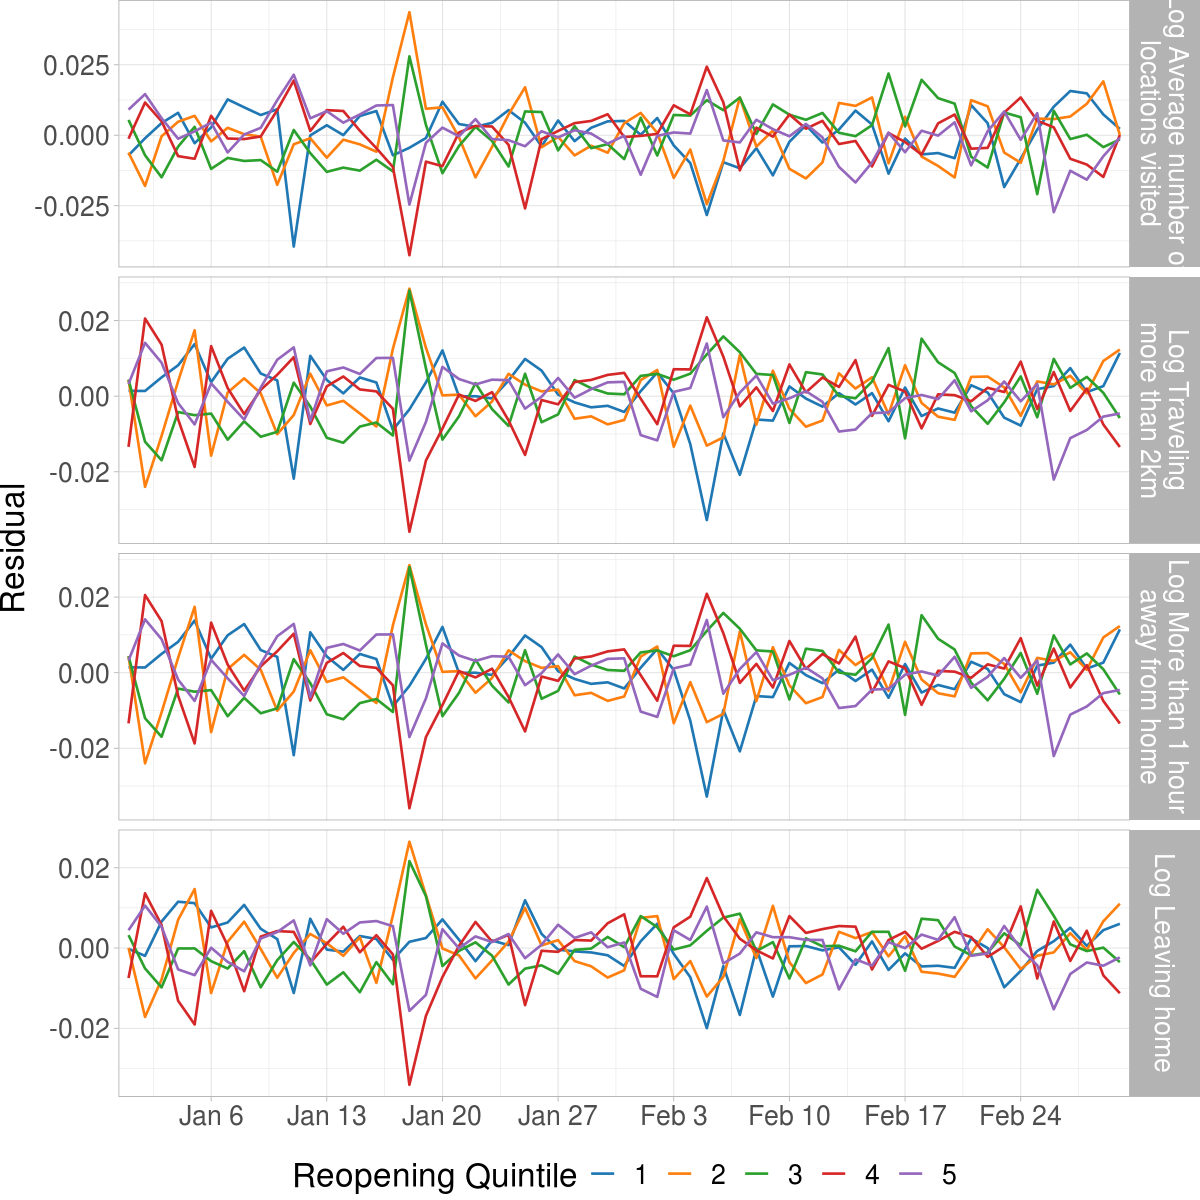

In [12]:
options(repr.plot.width=10, repr.plot.height=10)

pn <- c('log_mcbgv'    = 'Log Average number of\nlocations visited',
        'log_pgt2kmt'  = 'Log Traveling\nmore than 2km',
        'log_pgt1hafh' = 'Log More than 1 hour\naway from home',
        'log_pnchd'    = 'Log Leaving home')

policy %>%
    mutate(state = str_sub(key, 1, 2)) %>%
    select(state, p1sdp, p2shp, p3rop)  %>%
    distinct() %>%
    filter(state != 11) %>%
    select(state, p3rop) %>%
    mutate(q = ntile(p3rop, 5)) -> rq

rq %>%
    select(-p3rop) %>%
    inner_join(df %>%
               mutate(state = str_sub(key, 1, 2))) %>%
    filter(date <= as.Date('2020-03-01')) %>%
    group_by(date, q) %>%
    mutate(w = n/sum(n)) %>%
    summarize(log_mcbgv    = sum(log_mcbgv * w), 
              log_pgt2kmt  = sum(log_pgt1hafh * w),
              log_pgt1hafh = sum(log_pgt1hafh * w),
              log_pnchd    = sum(log_pnchd * w)) -> temp

temp %>%
    ungroup() %>%
    mutate_at(vars(matches('log')), function(x) felm(x ~ 0 | q + date, temp)$resid) %>%
    gather(key = 'dv', value = 'value', -date, -q) %>%
    mutate(dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = date, y = value, color = as.factor(q))) + 
    geom_line(size = .75) + 
    facet_grid(dv ~ ., scales = 'free', labeller = as_labeller(pn)) + 
    scale_color_d3() +
    ylab('Residual') + 
    labs(color = 'Reopening Quintile') +
    scale_x_date(date_breaks = '1 week', 
                 lim = c(as.Date('2020-01-01'), as.Date('2020-03-01')), 
                 labels = date_format("%b %-d"),
                 expand = c(0.01, 0.01)) +
    theme_light() + 
    theme(text = element_text(size = 20),
          axis.title.x = element_blank(),
          legend.position = 'bottom',
          plot.margin = unit(c(0, 0, 0, 0), "in")) -> pt_did

pt_did
ggsave('~/SI_plots/pt_did.pdf', pt_did, device = 'pdf', width = 6.5, height = 6.5, scale = 2)

In [14]:
rq %>%
    group_by(q) %>%
    summarize(mro = median(p3rop))

q,mro
<int>,<date>
1,2020-04-27
2,2020-05-01
3,2020-05-06
4,2020-05-13
5,2020-05-19


In [15]:
df %>%
    select(key, date, all_of(dvs)) %>%
    gather(key = 'dv', value = 'value', -key, -date) %>%
    left_join(df %>%
              select(key, date, PRCP, TMAX)) -> dv_weather

Joining, by = c("key", "date")



In [16]:
dyad %>%
    filter(origin_cluster != destination_cluster) %>%
    mutate(state = str_pad(destination_cluster, 2, pad = '0')) %>%
    inner_join(rq) -> dyad

Joining, by = c("state", "p3rop", "q")



In [17]:
dyad %>%
    mutate(r1 = felm(log(ndotd) ~ 0 | dyad + date, .)$resid,
           r2 = felm(log(pdotd) ~ 0 | dyad + date, ., weights = .$n)$resid) %>%
    filter(date < as.Date('2020-03-01')) -> temp

Warning message:
“attributes are not identical across measure variables;
they will be dropped”


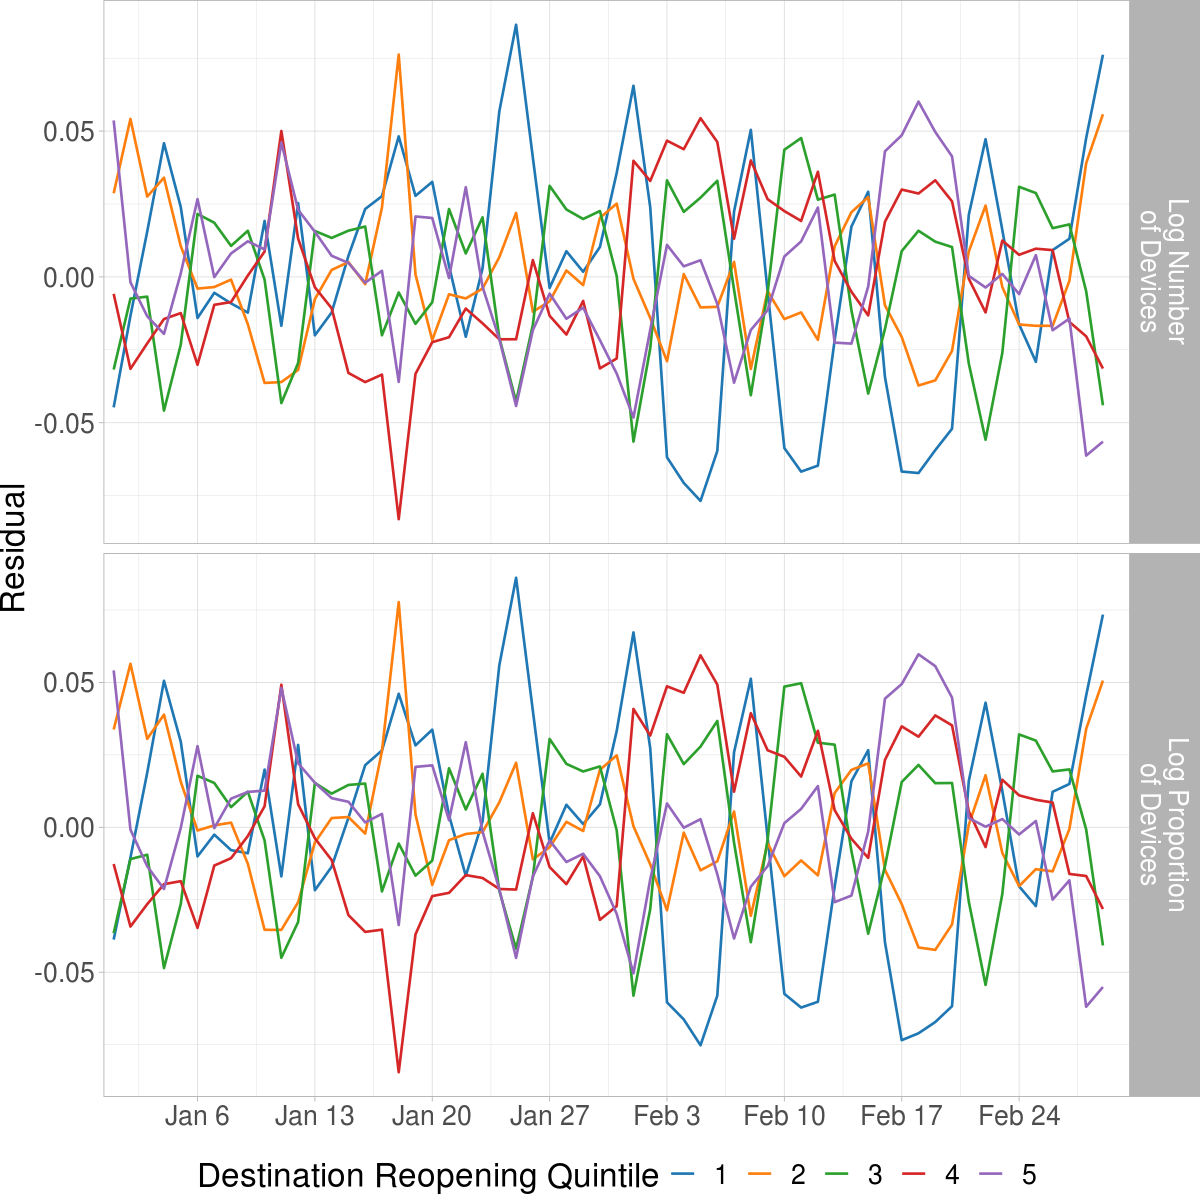

In [18]:
pn <- c('log_ndotd'  = 'Log Number\nof Devices',
        'log_pdotd'  = 'Log Proportion\nof Devices')

temp %>%
    group_by(date, q) %>%
    summarize(log_ndotd = mean(log(ndotd)), log_pdotd = mean(log(pdotd))) %>%
    ungroup() %>%
    mutate(log_ndotd = felm(log_ndotd ~ 0 | q + date, .)$resid, 
           log_pdotd = felm(log_pdotd ~ 0 | q + date, .)$resid) %>%
    gather(key = 'dv', value = 'value', -date, -q) %>%
    ggplot(aes(x = date, y = value, color = as.factor(q))) + 
    geom_line(size = .75) + 
    facet_grid(dv ~ ., scales = 'free', labeller = as_labeller(pn)) + 
    scale_color_d3() +
    ylab('Residual') +
    labs(color = 'Destination Reopening Quintile') +
    scale_x_date(date_breaks = '1 week', 
                 lim = c(as.Date('2020-01-01'), as.Date('2020-03-01')), 
                 labels = date_format("%b %-d"),
                 expand = c(0.01, 0.01)) +
    theme_light() + 
    theme(text = element_text(size = 20),
          axis.title.x = element_blank(),
          legend.position = 'bottom',
          plot.margin = unit(c(0, 0, 0, 0), "in")) -> pt_dyad

pt_dyad
ggsave('~/SI_plots/pt_dyad.pdf', pt_dyad, device = 'pdf', width = 6.5, height = 4, scale = 2)